# Perceptron [PyTorch]
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [perceptron_PyTorch.ipynb](https://github.com/diegoinacio/machine-learning-notebooks/blob/master/Deep-Learning-Models/perceptron_PyTorch.ipynb)
---
Perceptron or binary logistic regression algorithm using PyTorch library and MNIST dataset.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import datasets, transforms

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
train_set = datasets.MNIST(root='./mnist', train=True, transform=None, download=True)
test_set = datasets.MNIST(root='./mnist', train=False, transform=None, download=True)
X_train, Y_train = train_set.train_data.numpy(), train_set.train_labels.numpy()
X_test, Y_test = test_set.test_data.numpy(), test_set.test_labels.numpy()

# data cleaning
# using only zeros and ones
X_train = X_train[Y_train <= 1]
Y_train = Y_train[Y_train <= 1]
X_test = X_test[Y_test <= 1]
Y_test = Y_test[Y_test <= 1]

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

X_train: (12665, 28, 28)
Y_train: (12665,)
X_test: (2115, 28, 28)
Y_test: (2115,)


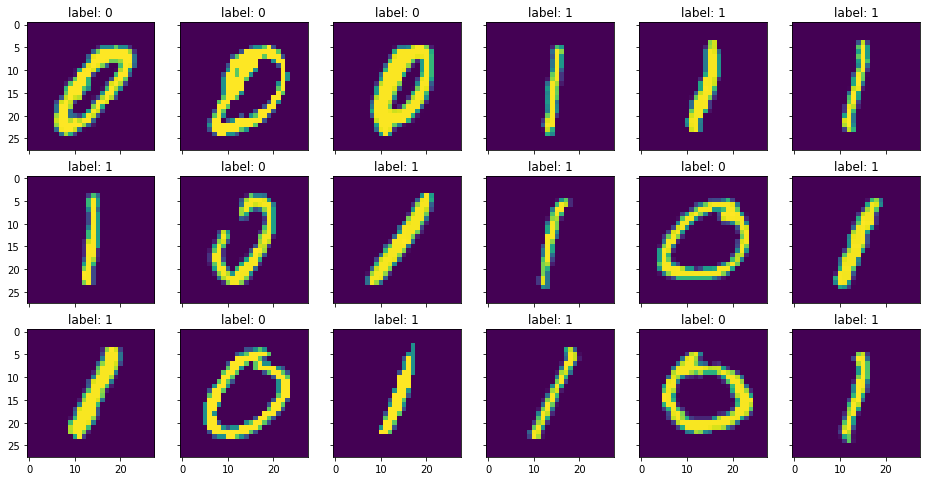

In [4]:
fig, AX = plt.subplots(3, 6, sharex=True, sharey=True)

np.random.seed(1234)
for ax in AX.ravel():
    rindex = np.random.randint(Y_train.size)
    ax.imshow(X_train[rindex])
    ax.set_title('label: {}'.format(Y_train[rindex]))
plt.grid(False)

In [5]:
# data preparation
# scales, dimensions and dtypes
x_train, y_train = X_train/255, Y_train[np.newaxis].T
x_test, y_test = X_test/255, Y_test[np.newaxis].T

x_train = x_train.astype(np.float32).reshape(-1, 28*28)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32).reshape(-1, 28*28)
y_test = y_test.astype(np.float32)

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (12665, 784)
y_train: (12665, 1)
x_test: (2115, 784)
y_test: (2115, 1)


## Perceptron
---
![perceptron](sourceimages/perceptron.png "Perceptron")

In [6]:
EPOCHS = 500  # epochs
ALPHA = 0.001 # learning rate
BATCH = 100   # batch size

# m is the number of examples
# n_x is the input size 28x28=784
m, n_x = x_train.shape

# model
Z = torch.nn.Linear(n_x, 1, bias=True)
torch.nn.init.zeros_(Z.weight)

# training graph and optimization
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(Z.parameters(), lr=ALPHA)

# loss and accuracy storage
loss_plot = []; accA_plot = []

for epoch in range(EPOCHS + 1):
    # randomic batch definition
    rbatch = np.random.choice(Y_train.size, size=BATCH)
    # variables initialization
    X = torch.autograd.Variable(torch.FloatTensor(x_train[rbatch]))
    Y = torch.autograd.Variable(torch.FloatTensor(y_train[rbatch]))
    # training, metrics and storage
    optimizer.zero_grad()
    L = loss(torch.sigmoid(Z(X)), Y)
    L.backward()
    optimizer.step()
    
    X_ = torch.autograd.Variable(torch.FloatTensor(x_test))
    Y_ = torch.autograd.Variable(torch.FloatTensor(y_test))
    prediction = torch.round(torch.sigmoid(Z(X_)))
    compare = torch.eq(prediction, Y_)
    cast = compare.float()
    acc = torch.mean(cast)*100
    
    loss_plot += [L.detach().numpy()]; accA_plot += [acc]
    if (not epoch % 100) and (epoch != 0):
        print('epoch: {0:04d} | loss: {1:.3f} | accuracy: {2:06.2f} %'.format(epoch, L, acc))
w_ = Z.weight.detach().numpy()
b_ = Z.bias.detach().numpy()

epoch: 0100 | loss: 0.185 | accuracy: 099.72 %
epoch: 0200 | loss: 0.143 | accuracy: 099.72 %
epoch: 0300 | loss: 0.120 | accuracy: 099.86 %
epoch: 0400 | loss: 0.095 | accuracy: 099.81 %
epoch: 0500 | loss: 0.082 | accuracy: 099.81 %


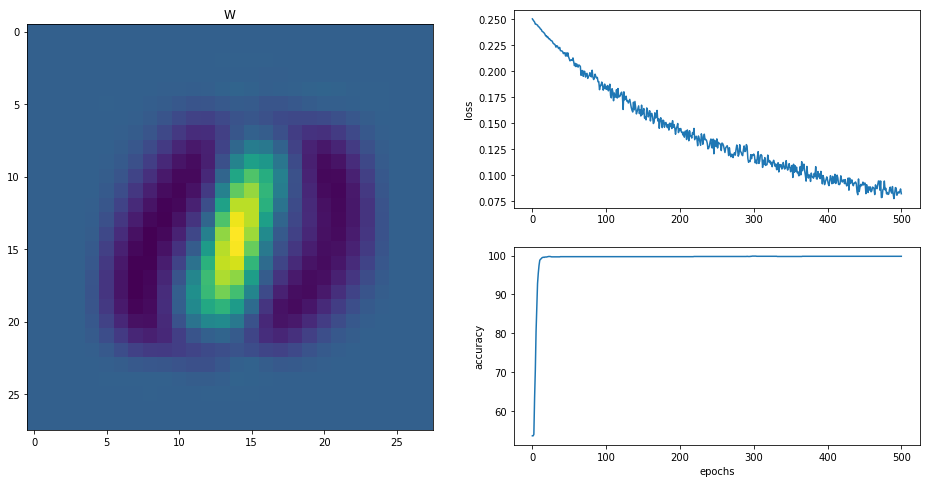

In [7]:
axA = plt.subplot(121)
axA.imshow(w_.T.reshape(28, 28))
cb = axA.set_title('W')

axB = plt.subplot(222)
axB.plot(loss_plot)
axB.set_ylabel('loss')

axC = plt.subplot(224)
axC.plot(accA_plot)
axC.set_ylabel('accuracy')

plt.xlabel('epochs')

plt.show()

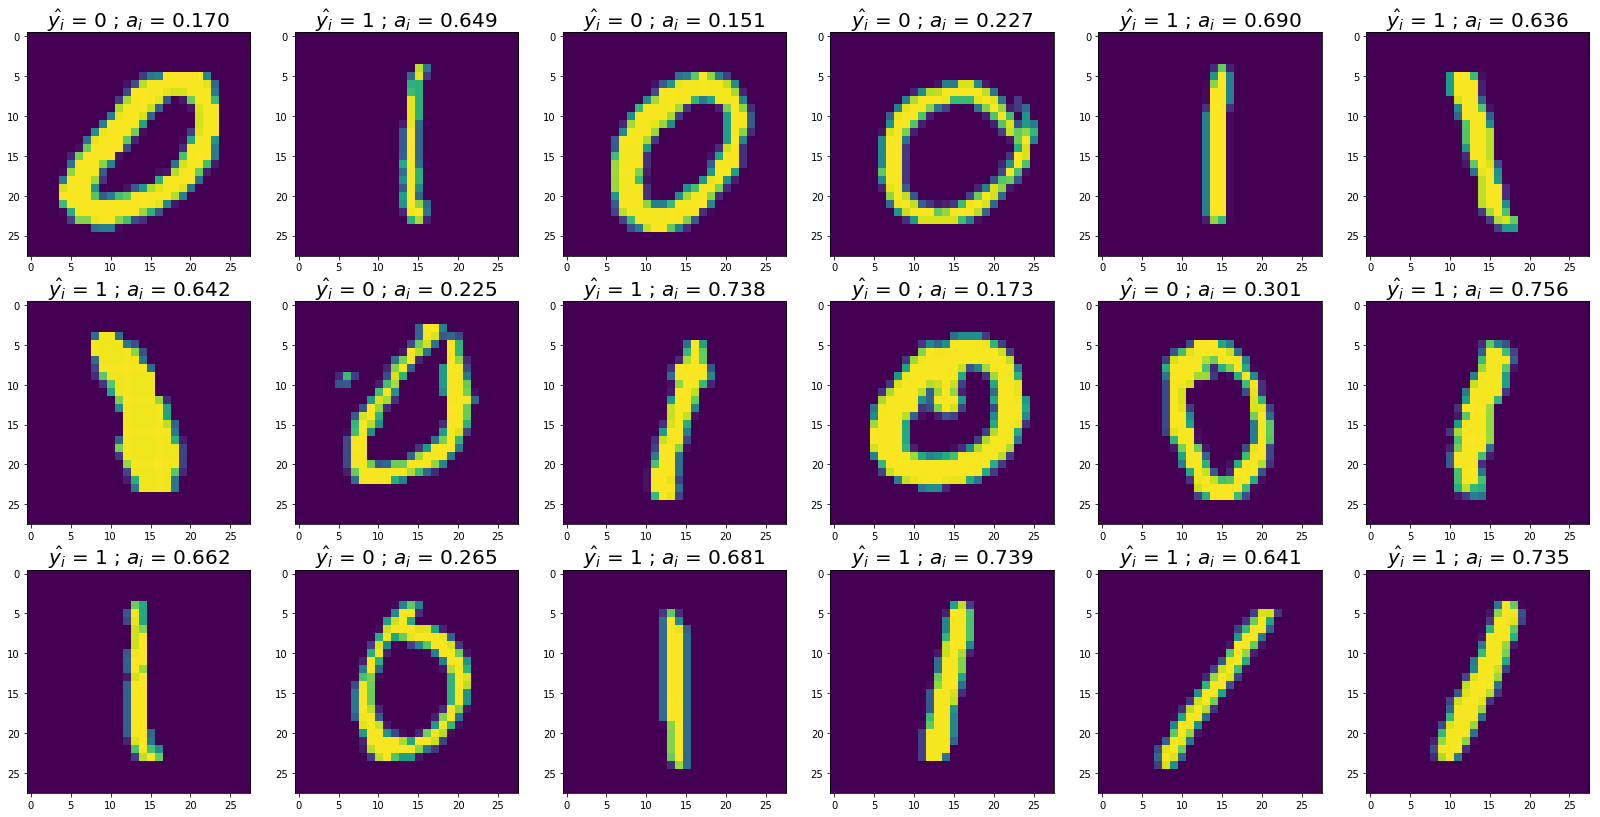

In [8]:
fig, AX = plt.subplots(3, 6, figsize=(2048//72, 1024//72))
AX = [b for a in AX for b in a]

np.random.seed(1)
for ax in AX:
    index = np.random.randint(y_test.size)
    z_ = np.dot(w_, x_test[index]) + b_
    a_ = 1/(1 + np.exp(-z_))
    y_ = 1 if a_ > 0.5 else 0
    if y_ == y_test[index]:
        ax.imshow(x_test[index].reshape(28, 28))
    else:
        ax.imshow(1 - x_test[index].reshape(28, 28))
    ax.set_title(r'$\hat{y_i}$ = ' + str(y_) + r' ; $a_i$ = {:.03f}'.format(float(a_)), fontsize=20)